In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [10]:
# load and preprocess
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y)))

    return x,y

In [11]:
train_data_path = "mnist_train.csv"
test_data_path = "mnist_test.csv"

x_train,y_train = load_and_preprocess(train_data_path)
x_test, y_test = load_and_preprocess(test_data_path)
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(60000, 10)
(10000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


No handles with labels found to put in legend.


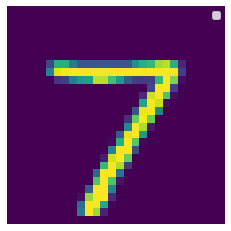

7


In [12]:
index = 12
vis = x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:]) 
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

#%% CNN
numberOfClass = y_train.shape[1]

In [13]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(Dropout(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Dropout(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Dropout(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 1024))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [14]:
# Train
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 5, batch_size= 5000)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 71s 1ms/step - loss: 2.1462 - accuracy: 0.3881 - val_loss: 1.9579 - val_accuracy: 0.6262
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 1.2923 - accuracy: 0.6498 - val_loss: 0.9743 - val_accuracy: 0.7968
Epoch 3/5
60000/60000 [==============================] - 60s 992us/step - loss: 0.6804 - accuracy: 0.7839 - val_loss: 0.5585 - val_accuracy: 0.8706
Epoch 4/5
60000/60000 [==============================] - 57s 954us/step - loss: 0.4819 - accuracy: 0.8515 - val_loss: 0.4422 - val_accuracy: 0.9039
Epoch 5/5
60000/60000 [==============================] - 57s 950us/step - loss: 0.3830 - accuracy: 0.8807 - val_loss: 0.3707 - val_accuracy: 0.9201


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


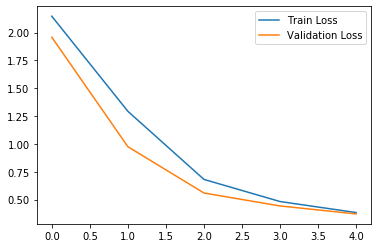

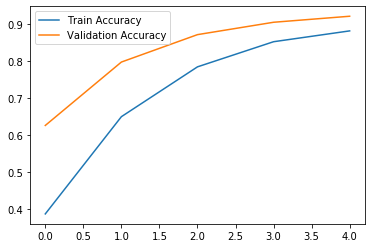

In [15]:
#%%
model.save_weights('cnn_mnist_model.h5')  # always save your weights after training or during training
#%% evaluation 
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()


In [25]:
import pandas as pd
import numpy as np
data_path = "../mnist_train.csv" 
data = pd.read_csv(data_path)
data = data.to_numpy()
np.random.shuffle(data)
# print(len(data[:,1:]))
print(data[:,3])
x = data[:,1:].reshape(-1,28,28,1)/255.0
y = data[:,0].astype(np.int32)




[0 0 0 ... 0 0 0]


In [39]:
b = np.array([[4.5,0.5,0.126],[4.7,0.48,0.59],[7.1,0.52,0.543]])
# b = b.reshape(-1,3,3,1)
print(b.shape)
c = b[:,0].astype(np.int32)
print(c)

(3, 3)
[4 4 7]
